# Dimensionality Reduction with UMAP Exercises

As usual, we're going to work with two datasets. The first you'll be walked through, while the second you will not.

___

### Load in Libraries

Load in any libraries you're using.

In [ ]:
# Load in the usual libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# UMAP isn't installed by default in Colab, so we must first install it
!pip install 'umap-learn==0.3.10'
import umap
import seaborn.objects as so

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38861 sha256=cc8fa428189c6efcf1b8594e747b6f858e7afa9af2a83d0ff924e651581c50e4
  Stored in directory: /root/.cache/pip/wheels/fa/7c/c0/f6b5434510bef2e044d9c2e81f2f204c85b1412e85a90a16aa
Successfully built umap-learn


## Exercise 1. Redlining Dataset
### Load in Dataset

* Once again, here is the [description of the dataset](https://github.com/fivethirtyeight/data/tree/master/redlining) on the FiveThirtyEight github.
* The url for the data is at https://raw.githubusercontent.com/fivethirtyeight/data/master/redlining/metro-grades.csv

In [ ]:
redlining = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/redlining/metro-grades.csv")
redlining.head()

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
0,"Akron, OH",A,24702,8624,956,688,1993,36963,66.83,23.33,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
1,"Akron, OH",B,41531,16499,2208,3367,4211,67816,61.24,24.33,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
2,"Akron, OH",C,73105,22847,3149,6291,7302,112694,64.87,20.27,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
3,"Akron, OH",D,6179,6921,567,455,1022,15144,40.80,45.70,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
4,"Albany-Schenectady-Troy, NY",A,16989,1818,1317,1998,1182,23303,72.91,7.80,...,387016,68371,42699,41112,40596,66.75,11.79,7.36,7.09,7.00


Data Pre-processing:
* Cut down the dataset to just the HOLC grade, the name of the metroplitan area, columns indicating the race percentage for each area (as well as the surrounding area). We don't want to keep the raw population counts.
* Remove any NAs from the dataset.
* Create a new dataframe with just the numeric data called `df` or whatever you like.
* For this dataset, all of the percentages are already in the range 0.0 to 1.0, so don't normalize by dividing by the maximum.

In [ ]:
redlining = redlining[["metro_area","holc_grade","pct_white","pct_black","pct_asian","pct_hisp","pct_other","surr_area_pct_white","surr_area_pct_black","surr_area_pct_hisp","surr_area_pct_asian","surr_area_pct_other"]]

In [ ]:
redlining

,metro_area,holc_grade,pct_white,pct_black,pct_asian,pct_hisp,pct_other,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
0,"Akron, OH",A,66.83,23.33,1.86,2.59,5.39,71.24,16.55,2.58,4.05,5.58
1,"Akron, OH",B,61.24,24.33,4.96,3.26,6.21,71.24,16.55,2.58,4.05,5.58
2,"Akron, OH",C,64.87,20.27,5.58,2.79,6.48,71.24,16.55,2.58,4.05,5.58
3,"Akron, OH",D,40.80,45.70,3.00,3.75,6.75,71.24,16.55,2.58,4.05,5.58
4,"Albany-Schenectady-Troy, NY",A,72.91,7.80,8.57,5.65,5.07,66.75,11.79,7.36,7.09,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...
546,"York-Hanover, PA",D,29.32,23.71,0.82,40.76,5.39,73.83,8.15,11.30,2.13,4.58
547,"Youngstown-Warren-Boardman, OH-PA",A,61.84,26.57,0.92,5.77,4.89,74.84,14.69,4.74,0.79,4.94
548,"Youngstown-Warren-Boardman, OH-PA",B,61.56,26.03,0.67,5.61,6.13,74.84,14.69,4.74,0.79,4.94
549,"Youngstown-Warren-Boardman, OH-PA",C,58.48,26.86,0.45,7.67,6.53,74.84,14.69,4.74,0.79,4.94


Fit a UMAP model.

In [ ]:
df= redlining.drop(["metro_area","holc_grade"],axis = 1)


In [ ]:
#We dont need to do a /.max() since its already a standardpercentage

,pct_white,pct_black,pct_asian,pct_hisp,pct_other,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
0,0.710051,0.273185,0.059255,0.027583,0.304005,0.799461,0.216907,0.031773,0.138651,0.359536
1,0.650659,0.284895,0.158012,0.034718,0.350254,0.799461,0.216907,0.031773,0.138651,0.359536


In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0)
embedding = reducer.fit_transform(df)

# The embedding contains x and y locations to plot points.
# The actual values don't matter, only what is nearby
plot_x, plot_y = embedding[:,0], embedding[:,1]

(-6.219232034683228, 9.073162508010864, -3.2234663724899293, 7.763126349449157)

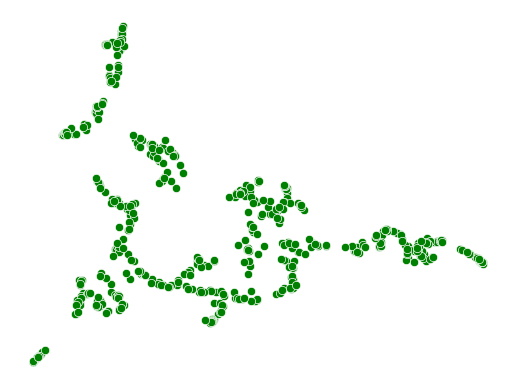

In [ ]:
sns.scatterplot(x = plot_x, y = plot_y, color = "green")
plt.axis("off")

(-6.219232034683228, 9.073162508010864, -3.2234663724899293, 7.763126349449157)

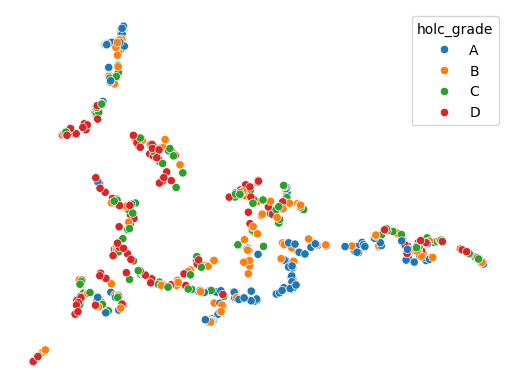

In [ ]:
#election["Red State"] = election["share_voters_voted_trump"] > 0.5

sns.scatterplot(x = plot_x, y = plot_y, hue=redlining["holc_grade"])
plt.axis("off")

# Pct only (no surrounding area)

In [ ]:
redlining["AorB"] = (redlining['holc_grade'] == "A") | (redlining['holc_grade'] == "B")
sns.scatterplot(x = plot_x, y = plot_y, hue=redlining["AorB"])
plt.axis("off")

In [ ]:
redlining_new = redlining[["metro_area","holc_grade","pct_white","pct_black","pct_asian","pct_hisp","pct_other"]]


df_new= redlining_new.drop(["metro_area","holc_grade"],axis = 1)


In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0)
embedding = reducer.fit_transform(df_new)

# The embedding contains x and y locations to plot points.
# The actual values don't matter, only what is nearby
plot_x, plot_y = embedding[:,0], embedding[:,1]

(-24.477878189086915,
 23.078910446166994,
 -23.504637718200684,
 25.950358390808105)

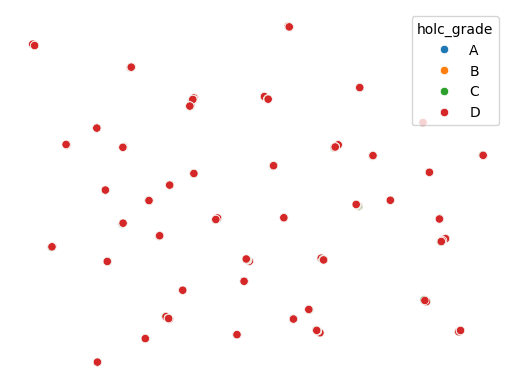

In [ ]:
redlining_new["AorB"] = (redlining_new['holc_grade'] == "A") | (redlining['holc_grade'] == "B")
sns.scatterplot(x = plot_x, y = plot_y, hue=redlining_new["AorB"])
plt.axis("off")

# Surrounding pct only

In [ ]:
surround = redlining[["metro_area","holc_grade","surr_area_pct_white","surr_area_pct_black","surr_area_pct_hisp","surr_area_pct_asian","surr_area_pct_other"]]

In [ ]:
df_newer= surround.drop(["metro_area","holc_grade"],axis = 1)

In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0) #Changing these parameters causes your dots to group or not group
embedding = reducer.fit_transform(df_newer)

# The embedding contains x and y locations to plot points.
# The actual values don't matter, only what is nearby
plot_x, plot_y = embedding[:,0], embedding[:,1]

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:227: UserWarning: Embedding a total of 42 separate connected components using meta-embedding (experimental)
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


(-29.684766960144042,
 24.550947380065917,
 -22.69956636428833,
 22.769102573394775)

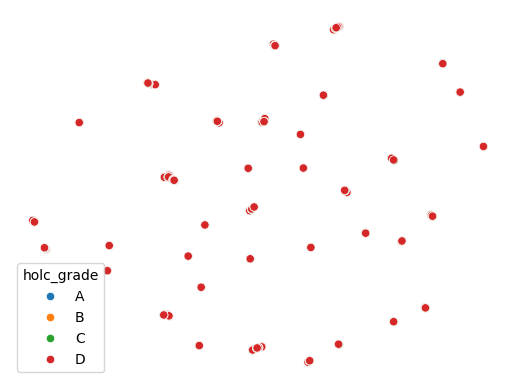

In [ ]:
sns.scatterplot(x = plot_x, y = plot_y, hue=surround["holc_grade"])
plt.axis("off")

Visualize the UMAP results and describe what you see.

Do you expect the groupings to split nicely based on some property from the original dataset?

In [ ]:
#I expect to breakup by HOLC

,pct_white,pct_black,pct_asian,pct_hisp,pct_other,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
0,66.83,23.33,1.86,2.59,5.39,71.24,16.55,2.58,4.05,5.58
1,61.24,24.33,4.96,3.26,6.21,71.24,16.55,2.58,4.05,5.58
2,64.87,20.27,5.58,2.79,6.48,71.24,16.55,2.58,4.05,5.58
3,40.80,45.70,3.00,3.75,6.75,71.24,16.55,2.58,4.05,5.58
4,72.91,7.80,8.57,5.65,5.07,66.75,11.79,7.36,7.09,7.00
...,...,...,...,...,...,...,...,...,...,...
546,29.32,23.71,0.82,40.76,5.39,73.83,8.15,11.30,2.13,4.58
547,61.84,26.57,0.92,5.77,4.89,74.84,14.69,4.74,0.79,4.94
548,61.56,26.03,0.67,5.61,6.13,74.84,14.69,4.74,0.79,4.94
549,58.48,26.86,0.45,7.67,6.53,74.84,14.69,4.74,0.79,4.94


Change the above plot but color by HOLC grade. What do you conclude?

In [ ]:
# A lot of the A's and Bs cluster together while the Ds all cluster together away from the As and Bs.
# However, there is a lot of overlap and the same type clusters are far away from eachother
# which would imply

Would it be worth labeling each datapoint with which metropolitan region it's from?

What might you gain? What do you expect to see?

___
## Exercise 2.

Perform an analysis using the [Palmer Penguins](https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv) dataset. This seems to be rapidly becoming a common dataset to work with because it is so clean. For lack of a better reference, [this site](https://allisonhorst.github.io/palmerpenguins/articles/intro.html) contains a description of what is going on in it.

Note that there are several different categorical columns here that you can do a comparison with.

* Perform a UMAP analysis and create plots illustrating clustering and whether those intersect with (or do not intersect with) the categorical variables. What do you learn?
* Read about the `n_neighbors` and `min_dist` parameters on the [UMAP package's website](https://umap-learn.readthedocs.io/en/latest/parameters.html). Try changing them. What additional insight does this offer?



In [ ]:
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv")
penguins.head()
penguins = penguins.dropna()

In [ ]:
df= penguins.drop(["species","island","sex"],axis = 1)

In [ ]:
df = df/df.max()

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0)
embedding = reducer.fit_transform(df)

# The embedding contains x and y locations to plot points.
# The actual values don't matter, only what is nearby
plot_x, plot_y = embedding[:,0], embedding[:,1]

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(


In [ ]:
sns.scatterplot(x = plot_x, y = plot_y, hue=penguins["species"])
plt.axis("off")

ValueError: array length 165 does not match index length 333

These Penguins are DISTINCT by their species, based on the bodymass/beak size/etc

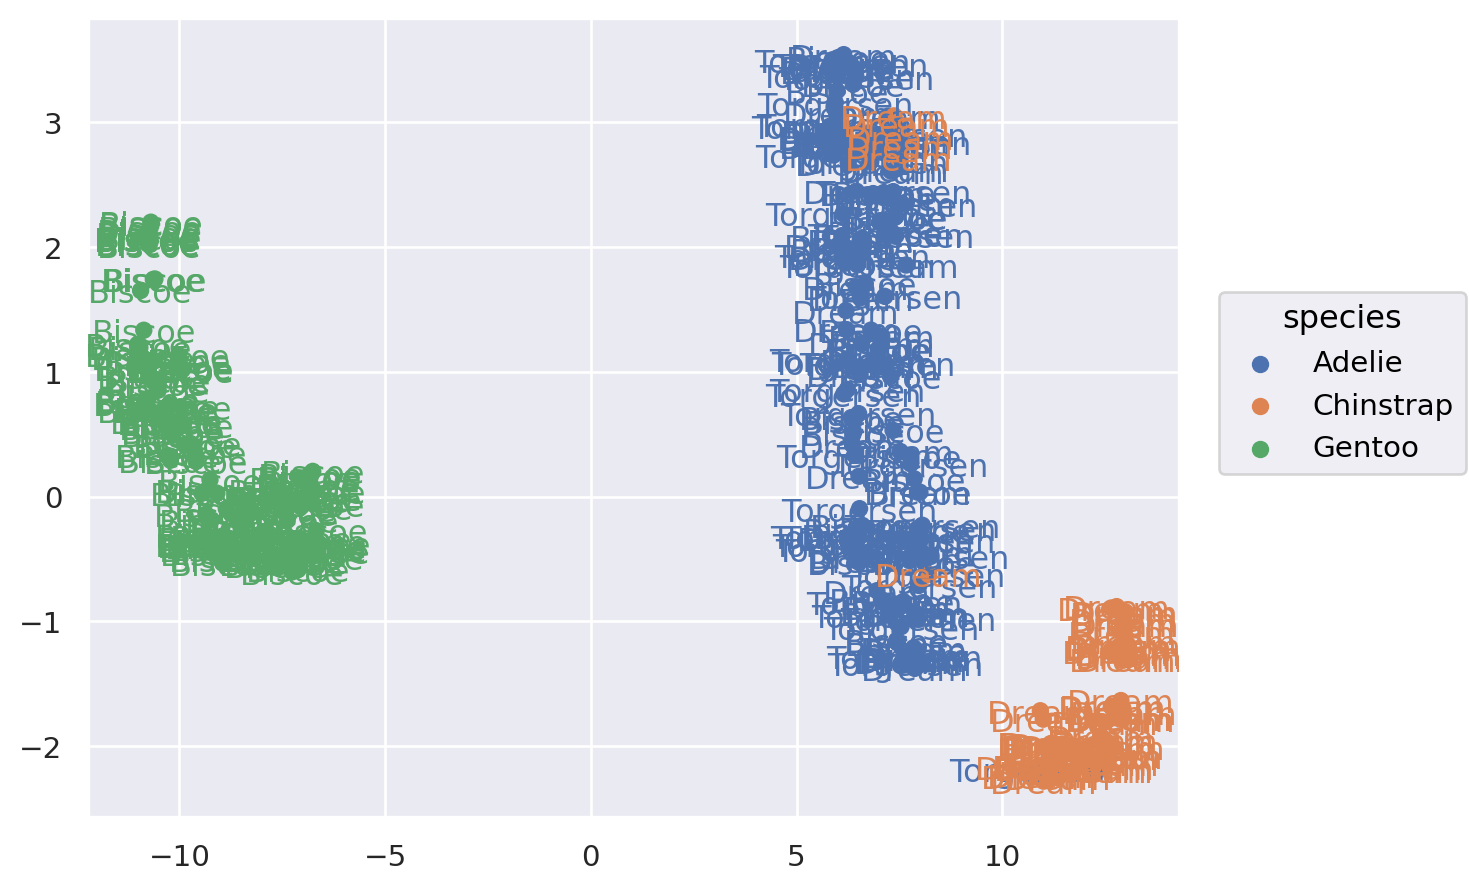

In [ ]:

so.Plot(x=plot_x,y=plot_y, color=penguins["species"], text=penguins.island).add(so.Dot()).add(so.Text())

(-12.223308753967284,
 14.290638160705566,
 -2.5700361728668213,
 3.8291656970977783)

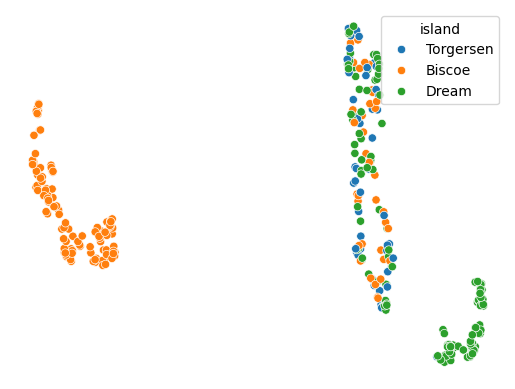

In [ ]:
sns.scatterplot(x = plot_x, y = plot_y, hue=penguins["island"])
plt.axis("off")

In [ ]:
sns.scatterplot(x = plot_x, y = plot_y, hue=penguins["sex"])
plt.axis("off")

ValueError: array length 165 does not match index length 333

In [ ]:
Adelie = penguins[penguins["species"] == "Adelie"] #Looking at Adelie species divided by whos in the top half of heaviest

Adelie["top_half"] = (Adelie["body_mass_g"]>= Adelie["body_mass_g"].median())

<ipython-input-40-13d6c3bd94af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adelie["top_half"] = (Adelie["body_mass_g"]>= Adelie["body_mass_g"].median())


In [ ]:
df= Adelie.drop(["species","island","sex", "top_half"],axis = 1)
df = df/df.max()

In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0)
embedding = reducer.fit_transform(df)

# The embedding contains x and y locations to plot points.
# The actual values don't matter, only what is nearby
plot_x, plot_y = embedding[:,0], embedding[:,1]

In [ ]:
Adelie["sex"].replace("MALE","Male",inplace =True)
Adelie["sex"].replace("FEMALE","Female",inplace =True)

<ipython-input-56-45caed074321>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adelie["sex"].replace("M","Male",inplace =True)
<ipython-input-56-45caed074321>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adelie["sex"].replace("F","Female",inplace =True)


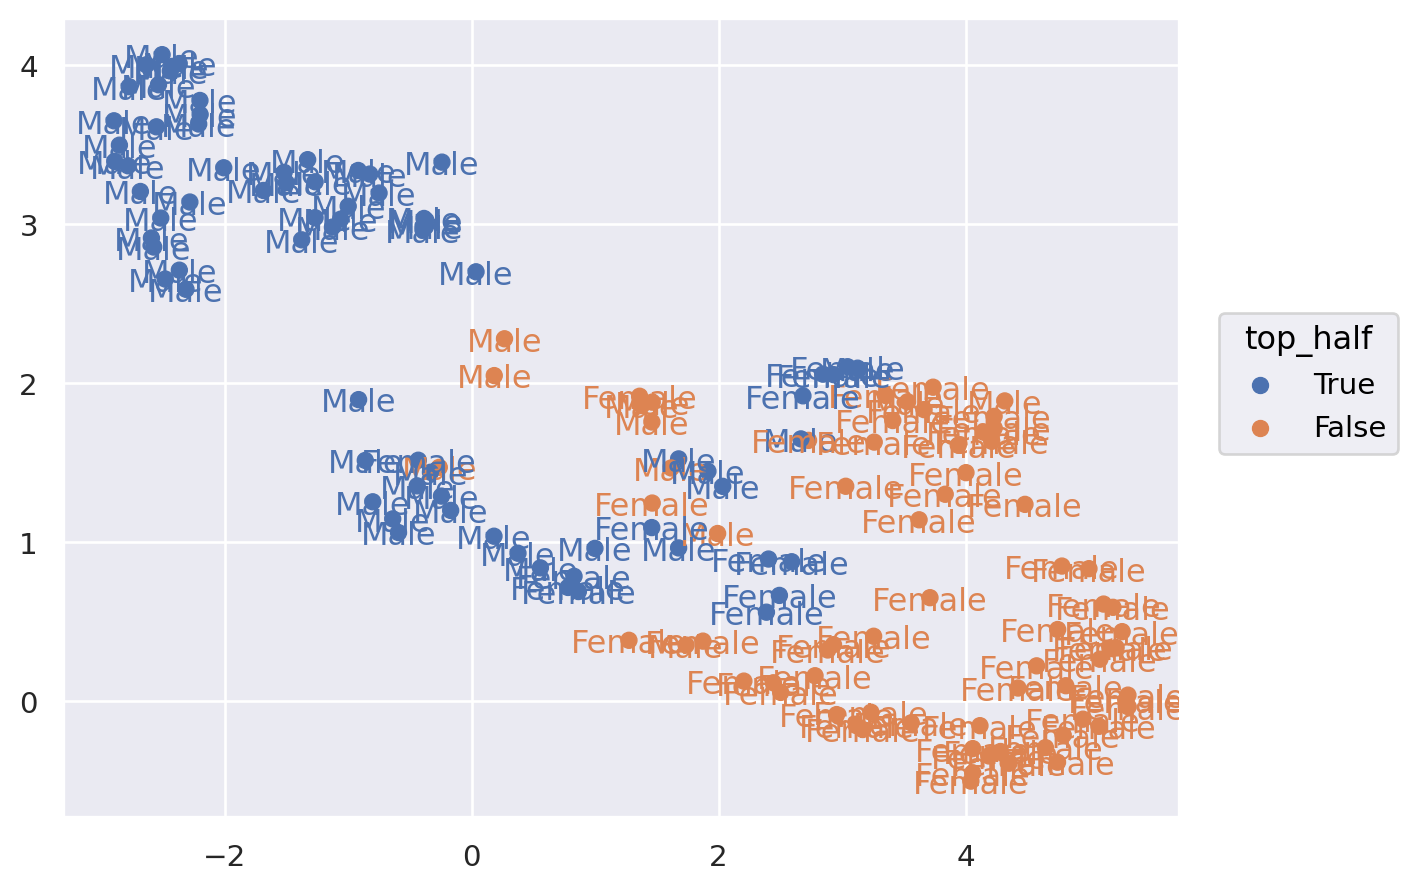

In [ ]:
so.Plot(x=plot_x,y=plot_y, color=Adelie["top_half"], text=Adelie.sex).add(so.Dot()).add(so.Text())

In [ ]:
#Looking at all penguins of Male only

In [ ]:
male = penguins[penguins.sex == "MALE"]
male

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,top_half
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,False
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE,True
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE,False
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE,True
...,...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE,True
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE,True
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE,True
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,True


In [ ]:
df= male.drop(["species","island","sex"],axis = 1)

df = df/df.max()

In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0)
embedding = reducer.fit_transform(df)

# The embedding contains x and y locations to plot points.
# The actual values don't matter, only what is nearby
plot_x, plot_y = embedding[:,0], embedding[:,1]

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:227: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  warn(


(-14.792576217651368,
 22.018013381958006,
 -6.3366570472717285,
 11.703199863433838)

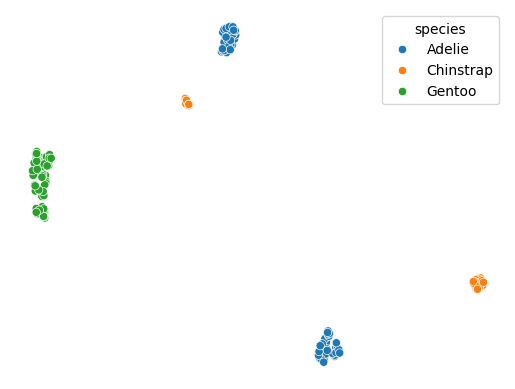

In [ ]:

sns.scatterplot(x = plot_x, y = plot_y, hue=male["species"])
plt.axis("off")

In [ ]:
#Now female

female = penguins[penguins.sex == "FEMALE"]
female

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,top_half
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,False
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,False
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE,False
...,...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE,True
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE,True
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,True
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,True


In [ ]:
df= female.drop(["species","island","sex"],axis = 1)

df = df/df.max()

In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0)
embedding = reducer.fit_transform(df)

# The embedding contains x and y locations to plot points.
# The actual values don't matter, only what is nearby
plot_x, plot_y = embedding[:,0], embedding[:,1]

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(


(-9.777636432647705,
 11.194531345367432,
 -3.412500709295273,
 0.9368230998516083)

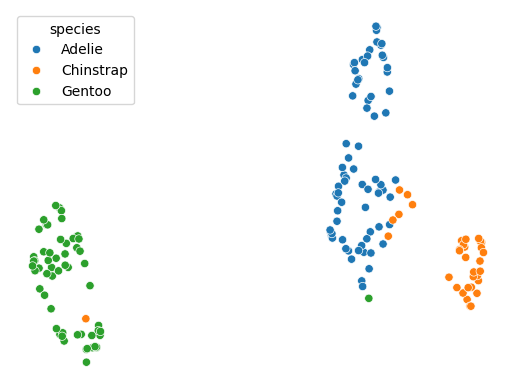

In [ ]:
sns.scatterplot(x = plot_x, y = plot_y, hue=female["species"])
plt.axis("off")